In [56]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import mindspore.dataset as ds
import mindspore.dataset.vision.c_transforms as C
import matplotlib.pyplot as plt

In [80]:
def visualize(X, y, y_pred, title=None, type='pca'):
    # 可视化,pca降维或者tsne
    if type == 'pca':
        pca = PCA(n_components=2)
        X_dim_reduction = pca.fit_transform(X)

    elif type == 'tsne':
        t_sne = TSNE(n_components=2)
        X_dim_reduction = t_sne.fit_transform(X)
    else:
        X_dim_reduction = X
    # print(X_dim_reduction.shape)
    plt.figure(figsize=(10, 12))

    def get_color(y):
        color_dict = {-1: 'white', 0: 'red', 1: 'orange', 2: 'yellow', 3: 'green', 4: 'magenta', 
                      5: 'blue', 6: 'cyan', 7: 'brown', 8: 'purple', 9: 'aquamarine'}
        color = []
        for i in range(y.shape[0]):
            color.append(color_dict.get(y[i].item(), 'olive'))
        return color
    plt.suptitle(title, fontweight=16)
    plt.subplot(211)
    plt.title('origin data')
    plt.scatter(X_dim_reduction[:, 0], X_dim_reduction[:, 1], c=get_color(y), edgecolors='black')
    plt.subplot(212)
    plt.title('cluster result')
    plt.scatter(X_dim_reduction[:, 0], X_dim_reduction[:, 1], c=get_color(y_pred), edgecolors='black')
    plt.show()

In [81]:
def get_dataset(split, num):
    data_path = './datasets/MNIST_Data/' + split
    dataset = ds.MnistDataset(data_path)
    dataset = dataset.batch(num)
    iterator_show = dataset.create_dict_iterator()
    dict_data = next(iterator_show)

    image_transforms = [
        C.Rescale(1.0 / 255.0, 0),
        C.Normalize(mean=(0.1307,), std=(0.3081,)),
        C.HWC2CHW()
    ]
    dataset = dataset.map(image_transforms, 'image')

    x = dict_data["image"].reshape(num, -1).asnumpy()
    y = dict_data["label"].asnumpy()
    print(x.shape)
    return x, y

In [82]:
x, y = get_dataset("train", 1000)

(1000, 784)


(1000, 500)


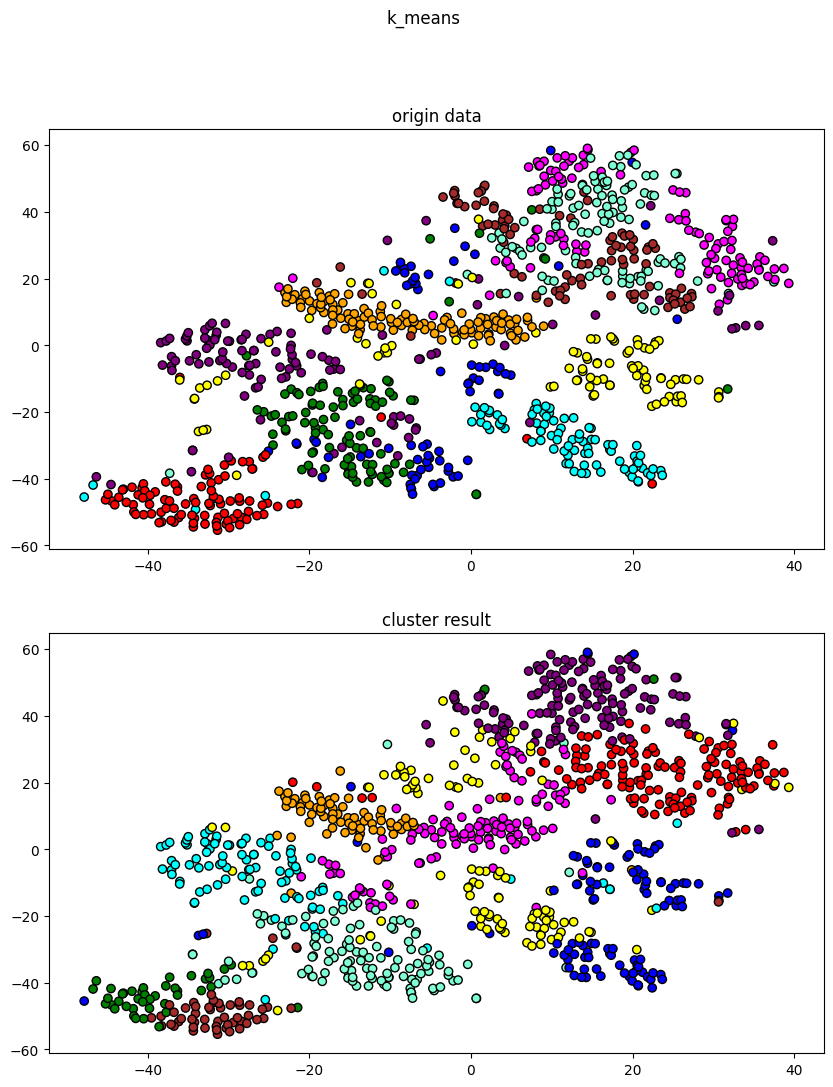

In [88]:
pca = PCA(n_components=500)
x_lower = pca.fit_transform(x)
print(x_lower.shape)


def k_means_cluster(X, y):
    k_means = KMeans(n_clusters=10)
    k_means.fit(X)
    y_pred = k_means.labels_
    # print(y_pred)
    visualize(X, y, y_pred, title='k_means', type='tsne')


k_means_cluster(x_lower, y)

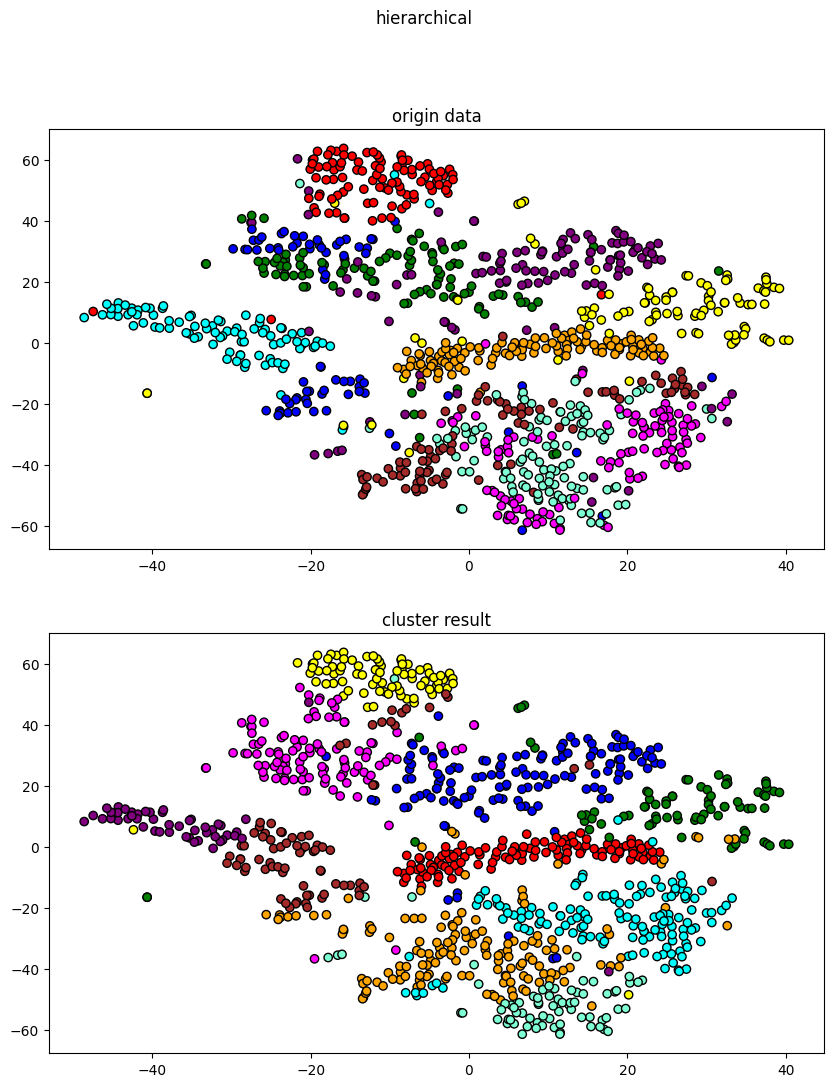

In [90]:
x_lower = x
print(x_lower.shape)


def hierarchical_cluster(X, y):
    hierarchical = AgglomerativeClustering(n_clusters=10)
    hierarchical.fit(X)
    y_pred = hierarchical.labels_
    # print(y_pred)
    visualize(X, y, y_pred, title='hierarchical', type='tsne')


hierarchical_cluster(x_lower, y)

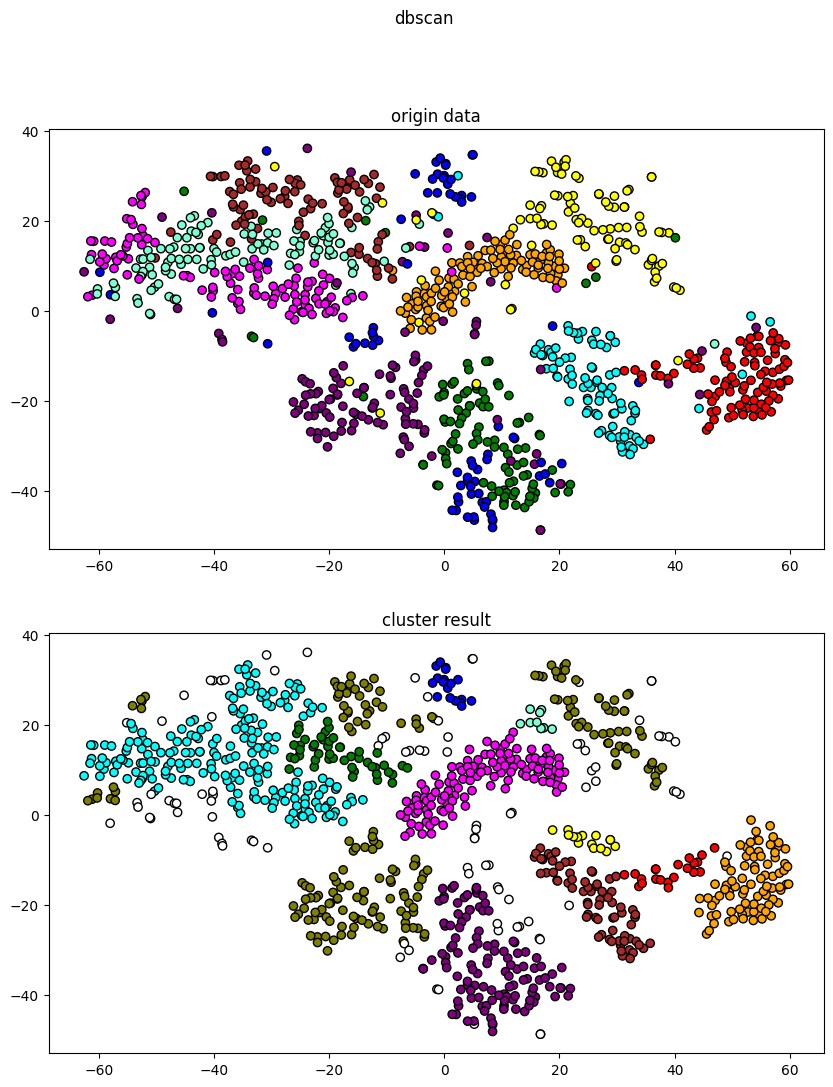

In [93]:
t_sne = TSNE(n_components=2)
x_lower = t_sne.fit_transform(x)
print(x_lower.shape)


def dbscan_cluster(X, y):
    dbscan = DBSCAN(min_samples=5, eps=3)
    dbscan.fit(X)
    y_pred = dbscan.labels_
    # print(y_pred)
    visualize(X, y, y_pred, title='dbscan', type='none')


dbscan_cluster(x_lower, y)